# MACHINE LEARNING DENGAN METODE SUPERVISED PADA DATASET Impact_of_Remote_Work_on_Mental_Health
Oleh :
1. Bunga Aprilian         (23083010003)
2. Amelia Zafira Karnaen  (23083010019)

## 1. Data Preprocessing (Pemrosesan Awal Data)

In [ ]:
# Membaca Dataset
import pandas as pd
data = pd.read_csv("/content/Impact_of_Remote_Work_on_Mental_Health.csv")
data

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [ ]:
data.shape

(5000, 20)

In [ ]:
data.dtypes

,0
Employee_ID,object
Age,int64
Gender,object
Job_Role,object
Industry,object
Years_of_Experience,int64
Work_Location,object
Hours_Worked_Per_Week,int64
Number_of_Virtual_Meetings,int64
Work_Life_Balance_Rating,int64


In [ ]:
print(data.isnull().sum())

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [ ]:
# Menggunakan value_counts untuk melihat jumlah dan distribusi kategori
category_counts = data['Satisfaction_with_Remote_Work'].value_counts()
print(f"Jumlah dan distribusi kategori dalam kolom 'satisfaction_level':")
print(category_counts)


Jumlah dan distribusi kategori dalam kolom 'satisfaction_level':
Satisfaction_with_Remote_Work
Unsatisfied    1677
Satisfied      1675
Neutral        1648
Name: count, dtype: int64


## 2. Data Preparation (Persiapan Data)

In [ ]:
data['Satisfaction_with_Remote_Work'] = data['Satisfaction_with_Remote_Work'].map({
    'Satisfied': 1,
    'Neutral': 0,
    'Unsatisfied': 2
})
features = ['Hours_Worked_Per_Week', 'Sleep_Quality', 'Access_to_Mental_Health_Resources']
X = data[features]
y = data['Satisfaction_with_Remote_Work']


In [ ]:
print(data['Satisfaction_with_Remote_Work'].unique())


[2 1 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Training Set dan Corpus Creation (Training Set dan Pembuatan Corpus)

In [ ]:
# standarisasi
# Buat objek LabelEncoder
encoder = LabelEncoder()

# Asumsi 'Sleep_Quality' dan 'Access_to_Mental_Health_Resources' adalah kolom yang bermasalah
for col in ['Sleep_Quality', 'Access_to_Mental_Health_Resources']:
    # Menyesuaikan pembuat enkode dengan nilai unik
    encoder.fit(data[col])
    # Ubah kolom menggunakan encoder
    data[col] = encoder.transform(data[col])

# Membuat X dan melanjutkan penskalaan
features = ['Hours_Worked_Per_Week', 'Sleep_Quality', 'Access_to_Mental_Health_Resources']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## 4. Model Creation and Training (Pembuatan dan Pelatihan Model)

In [ ]:
# Definisikan Model
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Evaluasi Awal Model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Validasi dengan Cross-Validation (opsional)
print("\nCross-Validation Scores:")
for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{model_name}: Mean accuracy = {scores.mean():.2f}, Std = {scores.std():.2f}")



Model: Logistic Regression
Accuracy: 0.306
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.25      0.28       502
           1       0.34      0.37      0.35       503
           2       0.27      0.29      0.28       495

    accuracy                           0.31      1500
   macro avg       0.31      0.31      0.30      1500
weighted avg       0.31      0.31      0.30      1500


Model: Decision Tree
Accuracy: 0.3313333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.36      0.35       502
           1       0.34      0.22      0.27       503
           2       0.32      0.41      0.36       495

    accuracy                           0.33      1500
   macro avg       0.33      0.33      0.33      1500
weighted avg       0.33      0.33      0.33      1500


Model: Random Forest
Accuracy: 0.32866666666666666
Classification Report:
               preci

## 5. Model Evaluation (Evaluasi Model)

In [ ]:
# Menyempurnakan dengan menyesuaikan parameter
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang ingin diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluasi ulang dengan model terbaik
y_pred = best_model.predict(X_test)
print("Accuracy (Best Model):", accuracy_score(y_test, y_pred))
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy (Best Model): 0.3293333333333333
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.30      0.25      0.27       502
           1       0.34      0.30      0.32       503
           2       0.34      0.44      0.38       495

    accuracy                           0.33      1500
   macro avg       0.33      0.33      0.33      1500
weighted avg       0.33      0.33      0.32      1500



## 6. Best Model Selection and Evaluation (Seleksi dan Evaluasi Model Terbaik)

In [ ]:
# Mengataasi masalah data tidak seimbang
from imblearn.over_sampling import SMOTE

# Oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Latih model ulang dengan data yang telah diseimbangkan
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Evaluasi ulang
y_pred = model.predict(X_test)
print("Accuracy (with SMOTE):", accuracy_score(y_test, y_pred))
print("Classification Report (with SMOTE):\n", classification_report(y_test, y_pred))


Accuracy (with SMOTE): 0.322
Classification Report (with SMOTE):
               precision    recall  f1-score   support

           0       0.31      0.26      0.29       502
           1       0.33      0.34      0.33       503
           2       0.32      0.37      0.34       495

    accuracy                           0.32      1500
   macro avg       0.32      0.32      0.32      1500
weighted avg       0.32      0.32      0.32      1500



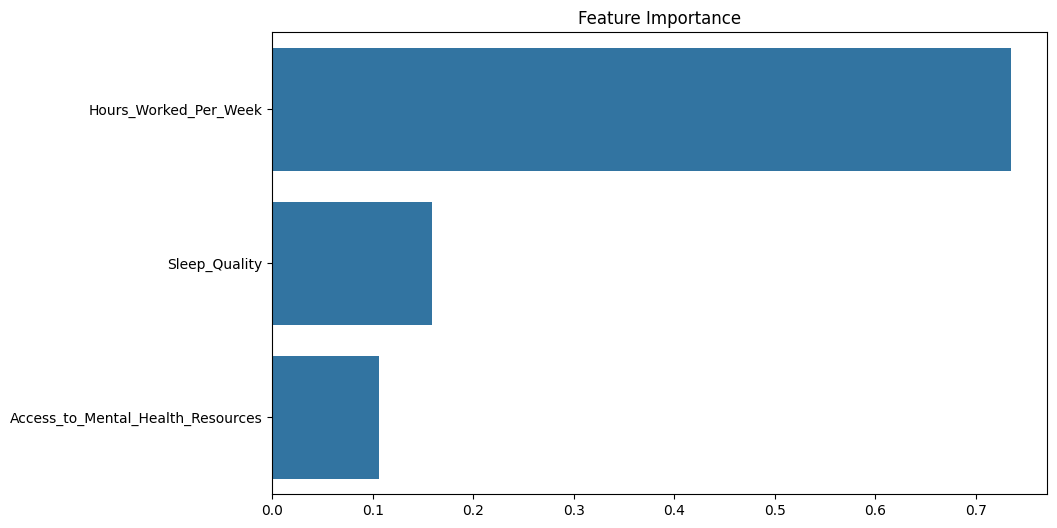

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance dari Random Forest
importances = best_model.feature_importances_
feature_names = features

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()


## 7. Model Deployment (Penerapan Model)

In [ ]:
# Prediksi dengan model terbaik
final_predictions = best_model.predict(X_test)

# Gabungkan data asli dengan prediksi
results = pd.DataFrame(X_test, columns=features)  # Data fitur uji
results['Actual'] = y_test.values                 # Nilai sebenarnya
results['Predicted'] = final_predictions          # Hasil prediksi

# Tampilkan hasil di layar
print(results.head())  # Tampilkan 5 baris pertama

   Hours_Worked_Per_Week  Sleep_Quality  Access_to_Mental_Health_Resources  \
0              -1.316687       1.214612                           -0.97902   
1               0.116823      -1.242624                            1.02143   
2              -0.895066       1.214612                            1.02143   
3              -1.232363      -0.014006                           -0.97902   
4              -0.726418      -1.242624                            1.02143   

   Actual  Predicted  
0       0          0  
1       1          1  
2       0          2  
3       1          0  
4       1          1  


## KESIMPULAN

Hasil prediksi model berdasarkan fitur **Hours_Worked_Per_Week**, **Sleep_Quality**, dan **Access_to_Mental_Health_Resources** yang telah dinormalisasi berhasil membuat prediksi yang benar pada beberapa data (misalnya, baris 0, 1, dan 4), tetapi juga mengalami kesalahan pada data lain (seperti baris 2 dan 3). Kesalahan ini menunjukkan bahwa model belum sepenuhnya mampu menangkap pola hubungan antar fitur dengan label kelas. Performa model yang belum optimal kemungkinan disebabkan oleh kompleksitas data, overlap antar kelas, atau noise dalam fitur. Evaluasi lebih lanjut terhadap fitur dan pengoptimalan model diperlukan untuk meningkatkan akurasi prediksi.